### IESB
___
### Pós Graduação em Inteligência Artificial
#### Disciplina: Estatística e Análise de dados
#### Docente: Mateus Mendelson
#### Discente: Henrique Brandão

# Credit card

In [106]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from seaborn_qqplot import pplot
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

%config IPCompleter.use_jedi = False
%matplotlib notebook

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
def _isnull(df):
    for c in df.columns:
        if df[pd.isnull(df[c])].shape[0] != 0:
            print(f'# {c}: {cnt} rows')

_isnull(df)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

#### 1) Visualização do histograma de gastos geral do dataset (atente-se para uma escolha adequada do parâmetro **bins**)


<IPython.core.display.Javascript object>


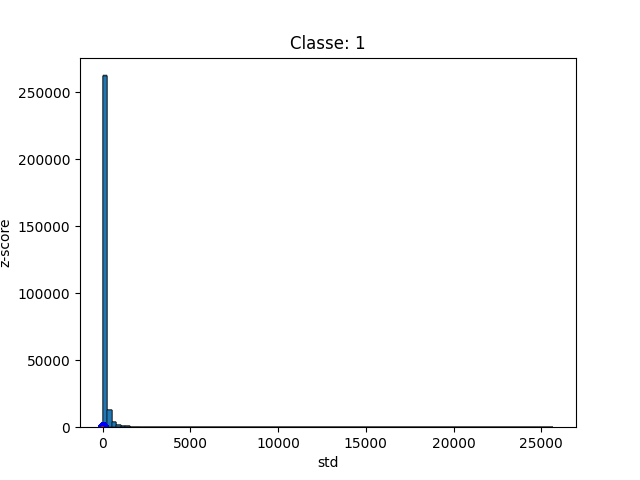

In [7]:
sns.histplot(data=df['Amount'], bins=100)
plt.show()

#### 2)  Visualização dos histogramas de gastos das transações fraudulentas e das transações não fraudulentas em separado (atente-se para uma escolha adequada do parâmetro **bins**)

In [14]:
# Legit
df['Amount'][df['Class'] == 0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
sns.histplot(data=df['Amount'][df['Class'] == 0], bins=100)
plt.title('Classe: 0')
plt.show()

In [16]:
# Fraud
df['Amount'][df['Class'] == 1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
sns.histplot(data=df['Amount'][df['Class'] == 1], bins=80)
plt.title('Classe: 1')
plt.show()

#### 3) Para cada histograma gerado, indique, utilizando QQ-Plot, qual distribuição mais se adequa a ele e caracterize a distribuição (média e desvio padrão)

Vamos normalizar as distribuições, através da seguinte relação: $z = \frac{x-\overline{x}}{\sigma}$

In [30]:
def normalizar_df(df, col: str):
    pop = df[col]
    media = df[col].mean()
    std = df[col].std()
    return (pop - media)/std    

- Geral

<IPython.core.display.Javascript object>


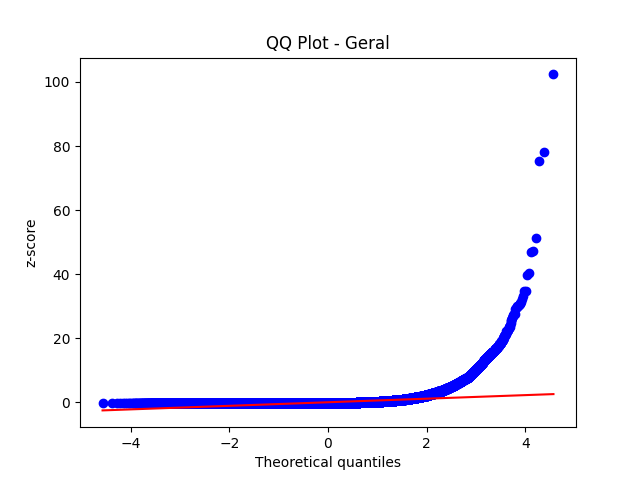

In [58]:
df_geral = df['Amount']
geral_media = df_geral.mean()
geral_std = df_geral.std()

z_geral = (df_geral - geral_media)/geral_std

scipy.stats.probplot(z_geral, plot=plt)
plt.title('QQ Plot - Geral')
plt.ylabel('z-score')
# plt.xlabel('std')
plt.show()

- Legítima

<IPython.core.display.Javascript object>


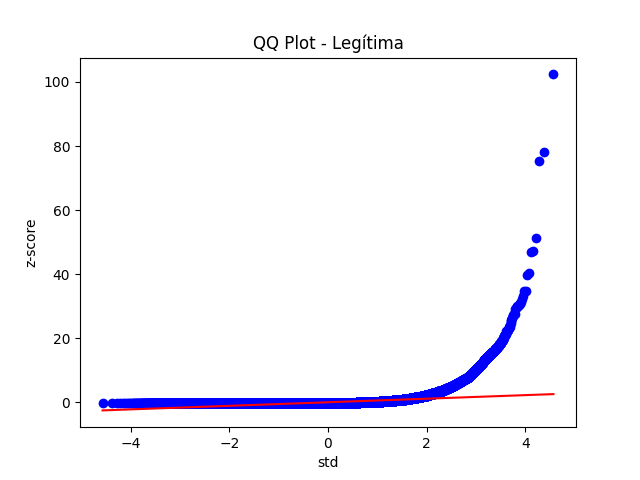

In [62]:
df_legit = df['Amount'][df['Class'] == 0]
legit_media = df_legit.mean()
legit_std = df_legit.std()

z_legit = (df_legit - legit_media)/legit_std

scipy.stats.probplot(z_legit, dist="norm", plot=plt)
plt.title('QQ Plot - Legítima')
plt.ylabel('z-score')
plt.xlabel('std')
plt.show()

- Fraude

<IPython.core.display.Javascript object>


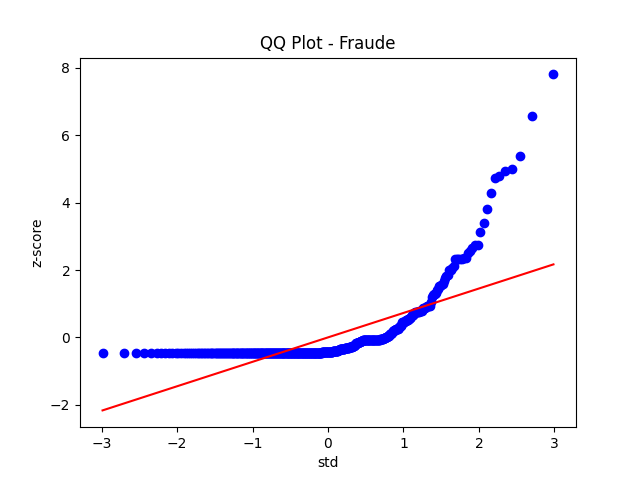

In [63]:
df_fraud = df['Amount'][df['Class'] == 1]
fraud_media = df_fraud.mean()
fraud_std = df_fraud.std()

z_fraud = (df_fraud - fraud_media)/fraud_std

scipy.stats.probplot(z_fraud, dist="norm", plot=plt)
plt.title('QQ Plot - Fraude')
plt.ylabel('z-score')
plt.xlabel('std')
plt.show()

#### 4) Realize um teste A/B da seguinte forma: separe, aleatoriamente, dois grupos. O grupo A deve conter 50% das transações não fraudulentas e 50% das transações fraudulentas. O grupo B, por sua vez, deve conter os dados restantes. Por exemplo, se o dataset tivesse 100 transações (sendo 80 não fraudulentas e 20 fraudulentas), o grupo A teria 40 transações não fraudulentas e 10 transações fraudulentas (as mesmas quantidades se aplicariam ao grupo B). O grupo A deve ser o grupo de controle. O grupo B será o grupo que receberá a nova técnica de identificação de transações fraudulentas. Essa técnica consiste em: caso a transação possua um valor maior ou igual a 122.20, ela deve ser classificada como fraudulenta. Avalie o desempenho dessa nova técnica sobre a porcentagem de transações fraudulentas do grupo A. Qual a porcentagem das transações que realmente eram fraudulentas realmente foram classificadas como fraudulentas? A técnica aplicada no grupo B é melhor do que a do grupo A?

In [21]:
sdf = shuffle(df[['Amount', 'Class']])
sdf.head()

,Amount,Class
175842,1.51,0
182727,25.00,0
172416,42.00,0
16581,3.80,0
120017,0.01,0


In [22]:
sdf_0 = sdf[sdf['Class'] == 0]
sdf_1 = sdf[sdf['Class'] == 1]

sdf_0.shape[0], sdf_1.shape[0], 

(284315, 492)

In [23]:
metade_0 = round(sdf_0.shape[0]/2)
metade_1 = round(sdf_1.shape[0]/2)

metade_0, metade_1

(142158, 246)

In [24]:
A = pd.concat([sdf_0[:metade_0], sdf_1[:metade_1]])
A.shape

(142404, 2)

In [107]:
B = pd.concat([sdf_0[metade_0:], sdf_1[metade_1:]])
B.shape

(142403, 2)

In [108]:
A['Class'].value_counts()

0    142158
1       246
Name: Class, dtype: int64

In [109]:
perc_fraudes_em_A = (A['Class'].value_counts()[1]/A.shape[0]) * 100
perc_fraudes_em_A
print('Percentual de fraudes em A: {:.2f}%'.format(perc_fraudes_em_A))

Percentual de fraudes em A: 0.17%


In [110]:
B['Class'].value_counts()

0    142157
1       246
Name: Class, dtype: int64

In [111]:
perc_fraudes_em_B = (B['Class'].value_counts()[1]/B.shape[0]) * 100
perc_fraudes_em_B
print('Percentual de fraudes em B: {:.2f}%'.format(perc_fraudes_em_B))

Percentual de fraudes em B: 0.17%


In [112]:
def regra_fraude(x):
    if x >= 122.20:
        return 1
    else:
        return 0

In [113]:
B.head()

,Amount,Class
163517,62.50,0
70537,3.57,0
9230,29.99,0
240317,550.00,0
93238,100.00,0


In [115]:
B['Pred_regra'] = B['Amount'].apply(regra_fraude)

In [116]:
confusion_matrix(y_true=B['Class'], y_pred=B['Pred_regra'])

array([[118429,  23728],
       [   183,     63]])

#### 5) Realize o seguinte teste de hipótese: transações fraudulentas possuem valores de gasto, na média, maiores ou iguais a 122.20

#### 6) Utilizando as classes `LogisticRegression` e `SMOTE`, realize oversampling e treine o modelo, relatando qual a porcentagem de transações fraudulentas detectadas.